In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt

# Combine the ppl outputs for different dropouts into a big df

In [57]:
ppl_path = Path('/content/drive/MyDrive/MT-exercises/mt-exercise-03/models').glob('*.csv')

dfs = []
for f in ppl_path:
  df = pd.read_csv(f)
  dfs.append(df)

ppl_df = pd.concat(dfs, axis=0)
ppl_df

,Mode,Dropout,Epoch,Ppl
0,train,0.0,1.0,508.253796
1,validation,0.0,1.0,283.854129
2,train,0.0,2.0,185.469677
3,validation,0.0,2.0,159.373074
4,train,0.0,3.0,120.768291
...,...,...,...,...
76,train,0.2,39.0,30.496393
77,validation,0.2,39.0,100.714844
78,train,0.2,40.0,30.604086
79,validation,0.2,40.0,100.714844


In [58]:
ppl_df

,Mode,Dropout,Epoch,Ppl
0,train,0.0,1.0,508.253796
1,validation,0.0,1.0,283.854129
2,train,0.0,2.0,185.469677
3,validation,0.0,2.0,159.373074
4,train,0.0,3.0,120.768291
...,...,...,...,...
76,train,0.2,39.0,30.496393
77,validation,0.2,39.0,100.714844
78,train,0.2,40.0,30.604086
79,validation,0.2,40.0,100.714844


# split the big df into 3 groups: train, valid, test 

In [59]:
grouped_df = ppl_df.groupby(['Mode', 'Dropout'])
grouped_df

In [60]:
train_ppl = []
valid_ppl = []
test_ppl = []
for key, group in grouped_df:
  temp = grouped_df.get_group(key)
  dff = temp.iloc[:, -2:]
  dff = dff.rename(columns={'Epoch': f'{key[0]}.perplexity', 'Ppl': f'Dropout {key[1]}'})
  
  if key[0]=='train':
    train_ppl.append(dff)
  elif key[0]=='validation':
    valid_ppl.append(dff)
  else:
    test_ppl.append(dff)


# Merge the dfs in each group which has different dropout rate and ppl into a wider df.

In [61]:
train = train_ppl[0]
train_column_1 =  train.columns[0]
valid = valid_ppl[0]
valid_column_1 =  valid.columns[0]
test = test_ppl[0]
test_column_1 = test.columns[0]

for i in range(1, len(train_ppl)):
    train = pd.merge(train, train_ppl[i], on=train_column_1)
train[train_column_1] = train[train_column_1].apply(lambda x: 'Epoch ' + str(int(x)))

for i in range(1, len(valid_ppl)):
    valid = pd.merge(valid, valid_ppl[i], on=valid_column_1)
valid[valid_column_1] = valid[valid_column_1].apply(lambda x: 'Epoch ' + str(int(x)))

for i in range(1, len(test_ppl)):
    test = pd.merge(test, test_ppl[i], on=test_column_1)

# out put dataframes to csv files.

In [63]:
train.to_csv('/content/drive/MyDrive/MT-exercises/mt-exercise-03/models/train_ppl.csv', index=False)
valid.to_csv('/content/drive/MyDrive/MT-exercises/mt-exercise-03/models/valid_ppl.csv', index=False)
test.to_csv('/content/drive/MyDrive/MT-exercises/mt-exercise-03/models/test_ppl.csv', index=False)

# Plot

## For training ppl vs. dropout

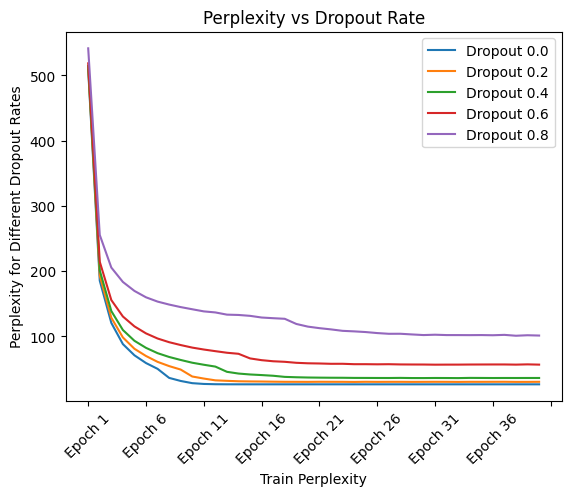

In [76]:
train.plot(x='train.perplexity', y=['Dropout 0.0', 'Dropout 0.2', 'Dropout 0.4', 'Dropout 0.6', 'Dropout 0.8'], 
        kind='line')

plt.xlabel('Train Perplexity')
plt.ylabel('Perplexity for Different Dropout Rates')
plt.title('Perplexity vs Dropout Rate')
plt.xticks(rotation=45)
plt.show()

## For validation ppl vs. dropout

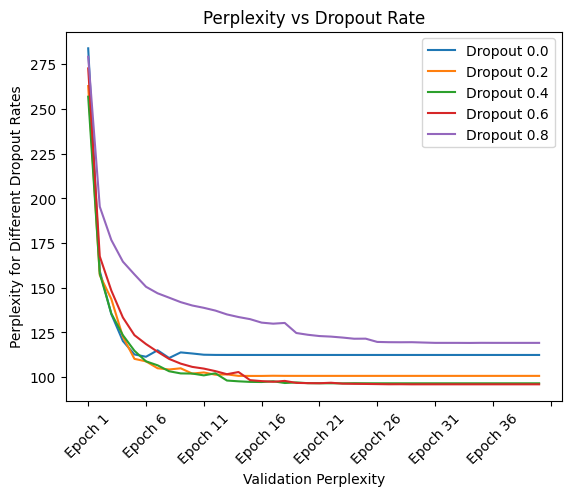

In [80]:
valid.plot(x='validation.perplexity', y=['Dropout 0.0', 'Dropout 0.2', 'Dropout 0.4', 'Dropout 0.6', 'Dropout 0.8'], 
        kind='line')

plt.xlabel('Validation Perplexity')
plt.ylabel('Perplexity for Different Dropout Rates')
plt.title('Perplexity vs Dropout Rate')
plt.xticks(rotation=45)
plt.show()